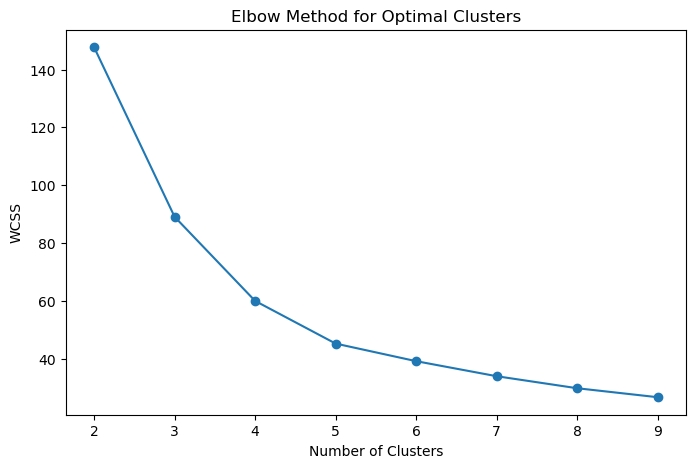

Davies-Bouldin Index: 0.7212797181816302


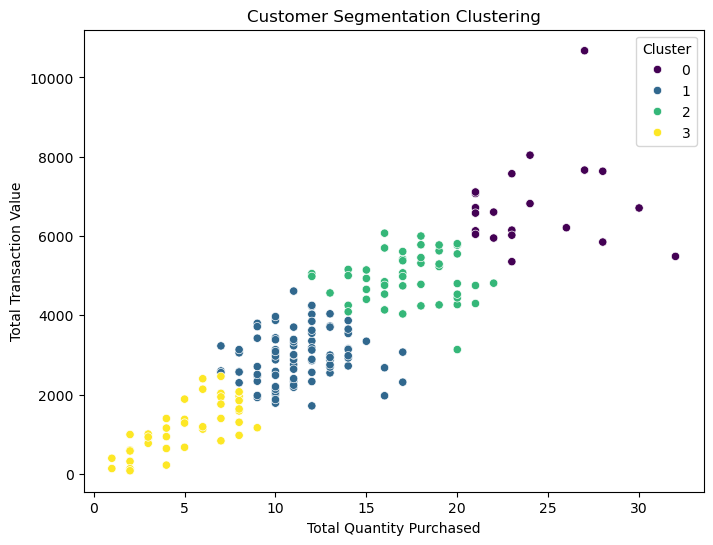

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import warnings

# Suppress specific warning
warnings.filterwarnings('ignore', category=UserWarning)

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets on CustomerID
data = pd.merge(customers, transactions, on="CustomerID")

# Feature Engineering: Aggregating transaction data
customer_features = data.groupby("CustomerID").agg({
    "Quantity": "sum",  # Total quantity purchased
    "TotalValue": "sum",  # Total transaction value
}).reset_index()

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features[["Quantity", "TotalValue"]])

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Apply K-Means Clustering
optimal_clusters = 4  # Set based on Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_features["Cluster"] = kmeans.fit_predict(features_scaled)

# Calculate DB Index
db_index = davies_bouldin_score(features_scaled, customer_features["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_features["Quantity"],
    y=customer_features["TotalValue"],
    hue=customer_features["Cluster"],
    palette="viridis"
)
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Transaction Value")
plt.title("Customer Segmentation Clustering")
plt.legend(title="Cluster")
plt.show()

# Save the Clustering Output
customer_features.to_csv("Monish_Sakpal_Clustering.csv", index=False)
